In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from GENE_ML.gene_ml.parsers.parser_timeseries import ParserTimeseries
parser_ts = ParserTimeseries()

<bound method Parser.open_file of <GENE_ML.gene_ml.parsers.parser_timeseries.ParserTimeseries object at 0x7f62e70ba510>>

[-1.0469e-16  1.3913e+00  2.5147e+00 ...  1.9777e+02  2.7907e+02
  3.7485e+02]


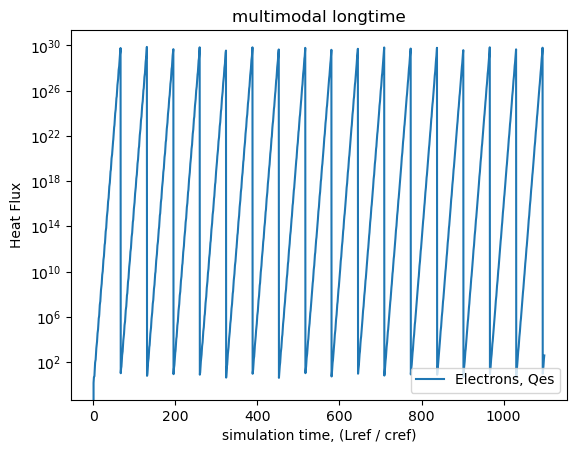

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from GENE_ML.gene_ml.parsers.parser_timeseries import ParserTimeseries
parser = GENE_scan_parser()
parser_ts = ParserTimeseries()

nrg_path =  '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/nrg_0010' 

nrg_path_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/nrg_0010' 
nrg_path_multimodal_longtime = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/nrg_0006' 
nrg_path_non_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/nrg_0005' 

def plot_Qes_history(nrg_path, title, tlim=None):
    species = parser_ts.read_species_names(parameters_path='/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/parameters')
    Qes, time = parser_ts.Qes_history(nrg_path)
    Qem, time = parser_ts.Qem_history(nrg_path)
    
    if tlim != None:
        tdif = np.abs(time-tlim)
        time = time[0:np.argmin(tdif)]
        Qes['1'] = Qes['1'][0:np.argmin(tdif)] 
    plt.figure()
    plt.title(title)

    plt.plot(time, Qes['1'], label=f'{species[0]}, Qes')
    print(Qes['1'])
    delta = Qes['1'] - np.roll(Qes['1'],1)
    
    # plt.plot(Qes['1'], label=f'{species[0]}, Qes', color='red')
    # plt.plot(delta, label=f'{species[0]}, Qes', color='red')
    
    # plt.xlim(0,200)
    # print(time[132])
    # print(delta[158])
    # print(Qes['1'][157])
    # print(Qes['1'][158])
    
    # plt.plot(time, Qes['2'], label=f'{species[1]}, Qes', color='orange')

    # plt.plot(time, Qem['1'], label=f'{species[0]}, Qem', color = 'blue')
    # plt.plot(time, Qem['2'], label=f'{species[1]}, Qem', color = 'cyan')
    plt.xlabel('simulation time, (Lref / cref)')
    plt.ylabel('Heat Flux')
    plt.yscale('log')
    plt.legend()
    plt.show()

# plot_Qes_history(nrg_path_multimodal, title='multimodal')
plot_Qes_history(nrg_path_multimodal_longtime, title='multimodal longtime')
# plot_Qes_history(nrg_path_non_multimodal, title='NON multimodal')

In [40]:
import matplotlib.pyplot as plt
from config import Config
import numpy as np
from scipy.fft import fft, fftfreq
from GENE_ML.gene_ml.runners.calculate_growthrate import calculate_growthrate
from GENE_ML.gene_ml.runners.calculate_growthrate import calculate_growthrate2

config = Config()
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from GENE_ML.gene_ml.parsers.parser_timeseries import ParserTimeseries

parser = GENE_scan_parser()
parser_ts = ParserTimeseries()

energy_path_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/energy_0010' 
field_path_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/field_0010' 

energy_path_multimodal_longtime = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/energy_0006' 
field_path_multimodal_longtime = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/field_0006' 

energy_path_non_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/energy_0005' 
field_path_non_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/field_0005' 

def plot_growthrate_history(energy_path, scanfiles_dir, suffix, title='', tlim=None, converged_value=None, xlim=[None, None], ylim=[None,None], nrg_path=None):
    time_units_to_average = 10

    
    if nrg_path != None:
        
        Qes, time_qes = parser_ts.Qes_history(nrg_path)
        eQes = Qes['1']
        time_in_1_index_shift = time_qes[-1] / len(time_qes)
        index_shift = int(time_units_to_average/time_in_1_index_shift)
        Qes_growthrate = np.empty(0)
        Q_gr_time = np.empty(0)
        plt.figure()
        plt.plot(time_qes, np.log(eQes))
        plt.xlim(*xlim)
        for i in range(index_shift,len(time_qes)):
            Qrange = np.log(eQes[i-index_shift:i])
            range_t = time_qes[i-index_shift:i]
            coeff = np.polyfit(range_t, Qrange, 1)
            Qes_gr = coeff[0]
            Qes_growthrate = np.append(Qes_growthrate,Qes_gr)
            Q_gr_time = np.append(Q_gr_time, time_qes[i])
            plt.plot(range_t, Qes_gr*range_t + coeff[1])
    plt.figure()
    plt.title(title)

    plt.plot(Q_gr_time, Qes_growthrate, label='eQes growthrate')

    

    growthrate1, time1 = calculate_growthrate2(scanfiles_dir, suffix)
    growthrate, time = parser_ts.growthrate_history(energy_path)
    #s = i*120
    if tlim != None:
        tdif = np.abs(time - tlim)
        tdif1 = np.abs(time1 - tlim)
        t = time[0:np.argmin(tdif)]#[s:s+120]
        t1 = time1[0:np.argmin(tdif1)]#[s:s+120]
        gr = growthrate[0:np.argmin(tdif)]#[s:s+120]
        gr1 = growthrate1[0:np.argmin(tdif1)]#[s:s+120]
        
    else:
        t = time
        t1 = time1
        gr = growthrate
        gr1 = growthrate1

    plt.ylabel('Growthrate')
    plt.plot(t, gr, label='Tobias Growthrate')
    time_in_1_index_shift = t[-1] / len(t)
    index_shift = int(time_units_to_average/time_in_1_index_shift)
    gr_mean = np.empty(0)
    t_m = np.empty(0)
    for i in range(index_shift, len(t)):
        gr_m = np.mean(gr[i-index_shift:i])
        gr_mean = np.append(gr_mean, gr_m)
        t_m = np.append(t_m, t[i])
    plt.plot(t_m, gr_mean, '--', color='orange')


    # plt.hlines(np.mean(gr), np.min(t), np.max(t), color='blue')
    # gr1[np.argwhere(gr1<-1)]=0
    plt.plot(t1, gr1, label='David Grothrate')
    # indexes in 10time units
    time_in_1_index_shift = t1[-1] / len(t1)
    index_shift = int(time_units_to_average/time_in_1_index_shift)
    print('indext shift:',index_shift)
    gr_mean = np.empty(0)
    t1_m = np.empty(0)
    for i in range(index_shift, len(t1)):
        gr_m = np.mean(gr1[i-index_shift:i])
        gr_mean = np.append(gr_mean, gr_m)
        t1_m = np.append(t1_m, t1[i])
    plt.plot(t1_m, gr_mean, '--', color='green')
    # plt.hlines(np.mean(gr1), np.min(t1), np.max(t1), color='orange')

    # plt.vlines(64.218, -20, 2, color = 'red')
    plt.legend()
    
    plt.xlabel('simulation time, (Lref/cref)')
    if converged_value != None:
        plt.hlines(converged_value,0,t[-1])
    # plt.yscale('log')
    
    plt.ylim(*ylim)
    plt.xlim(*xlim)

    # plt.figure()
    # plt.title(title)
    # plt.ylabel('Fourrier Growthrate')
    # plt.xlabel('frequency')
    
    
    # N = len(gr)
    # sample_rate = time[-1]/N
    # T = 1.0 / sample_rate
    # fourrier_growthrate = np.abs(fft(gr)[0:N//2])
    # frequency = fftfreq(N,T)[0:N//2]
    # plt.plot(frequency, fourrier_growthrate)
    # # plt.ylim(0,60)
    # plt.yscale('log')
    # # plt.xlim(s,s+120)

scanfiles_dir_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/'
scanfiles_dir_multimodal_longtime = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/'
scanfiles_dir_non_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/'

# plot_growthrate_history(energy_path_multimodal, scanfiles_dir_multimodal, '0010', 'multimodal')

# plot_growthrate_history(energy_path_multimodal_longtime, scanfiles_dir_multimodal_longtime, '0006', 'multimodal_longtime', xlim=[0,100], ylim=[0,1])

# plot_growthrate_history(energy_path_non_multimodal, scanfiles_dir_non_multimodal, '0005', 'NON multimodal')


[3.9730e-17 1.4111e+00 2.5479e+00 ... 2.0621e+09 3.2327e+09 4.2339e+09]


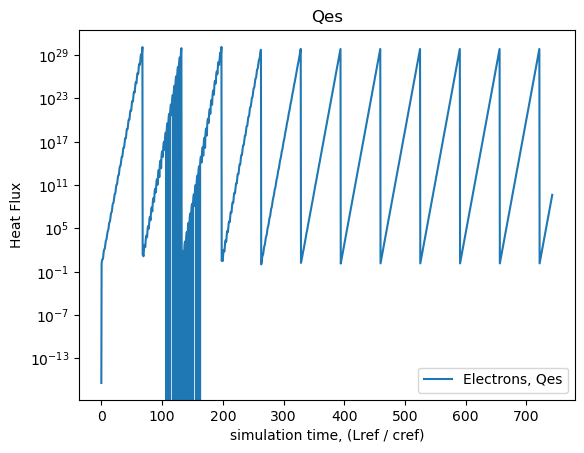

/tmp/ipykernel_129908/2222172257.py:37: RuntimeWarning: invalid value encountered in log
  plt.plot(time_qes, np.log(eQes))
/tmp/ipykernel_129908/2222172257.py:40: RuntimeWarning: invalid value encountered in log
  Qrange = np.log(eQes[i-index_shift:i])


indext shift: 3


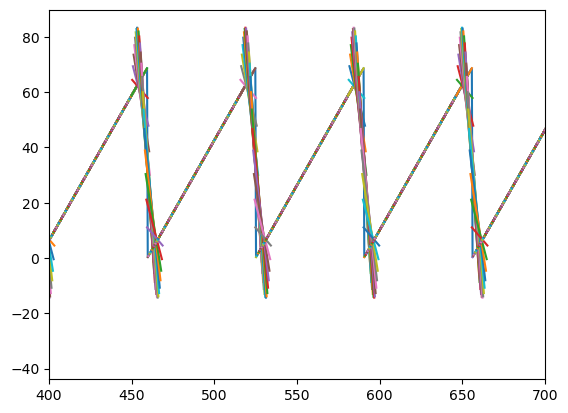

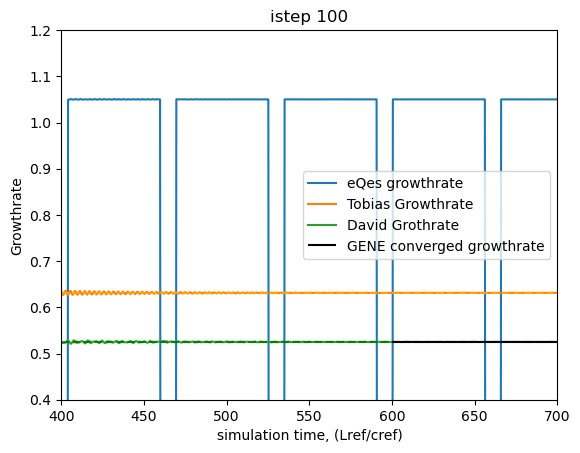

In [52]:
scanfiles_dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/'
energy_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/energy_0004'
field_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/field_0004'
nrg_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/nrg_0004' 

plot_Qes_history(nrg_path,'Qes')
plot_growthrate_history(energy_path, scanfiles_dir, '0004', 'istep 100',nrg_path=nrg_path, xlim=[400,700], ylim=[0.4,1.2])#, xlim=[175, 200], ylim=[0.536,0.537])
plt.hlines(0.525,600,700,color='black', label='GENE converged growthrate')
plt.legend()

[-4.3445e-17  2.5928e+00  3.9362e+00  6.4320e+00  8.4504e+00  1.0156e+01
  1.3140e+01  2.1616e+01  4.1488e+01  7.7403e+01  1.2696e+02  1.8002e+02
  2.3652e+02  3.3552e+02  5.6023e+02  9.9904e+02  1.6836e+03  2.5484e+03
  3.5093e+03  4.7949e+03  7.4140e+03  1.3144e+04  2.3479e+04  3.8100e+04
  5.4743e+04  7.2608e+04  9.9936e+04  1.6156e+05  2.9531e+05  5.2762e+05
  8.4147e+05  1.1824e+06  1.5509e+06  2.1713e+06  3.6112e+06  6.6331e+06
  1.1659e+07  1.8195e+07  2.5184e+07  3.3215e+07  4.7999e+07  8.1999e+07
  1.4986e+08  2.5696e+08  3.9040e+08  5.3236e+08  7.1066e+08  1.0663e+09
  1.8667e+09  3.3822e+09  5.6492e+09  8.3553e+09  1.1250e+10  1.5274e+10
  2.3797e+10  4.2421e+10  7.5925e+10  1.2356e+11  1.7836e+11  2.3836e+11
  3.3091e+11  5.3406e+11  9.6209e+11  1.6941e+12  2.6863e+12  3.7964e+12
  5.0668e+12  7.2313e+12  1.2044e+13  2.1769e+13  3.7586e+13  5.8080e+13
  8.0626e+13  1.0815e+14  1.5930e+14  2.7247e+14  4.9102e+14  8.2926e+14
  1.2498e+15  1.7107e+15  2.3209e+15  3.5349e+15  6

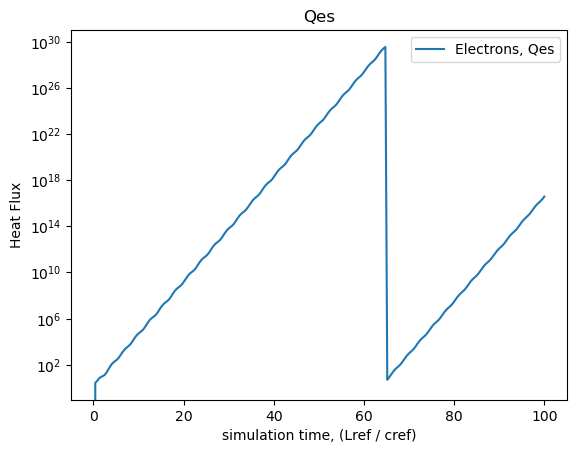

/tmp/ipykernel_129908/1268886725.py:37: RuntimeWarning: invalid value encountered in log
  plt.plot(time_qes, np.log(eQes))
/tmp/ipykernel_129908/1268886725.py:39: RuntimeWarning: invalid value encountered in log
  Qrange = np.log(eQes[i-index_shift:i])


indext shift: 118


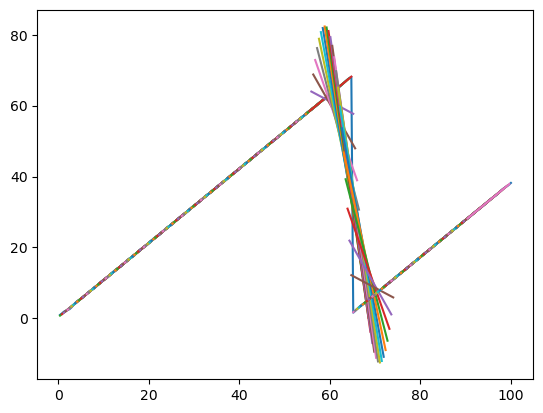

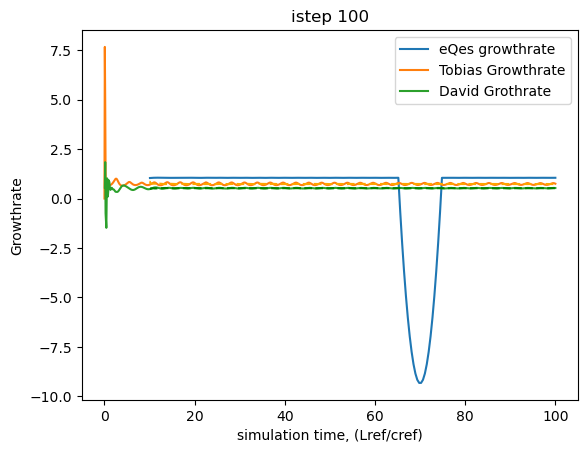

In [ ]:
scanfiles_dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/'#'/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scalecd ../.._batch-5/scanfiles0000/'
energy_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/energy_0004'#'/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/energy_0010' 
field_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/field_0004' 
nrg_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/nrg_0004' 

plot_Qes_history(nrg_path,'Qes')
plot_growthrate_history(energy_path, scanfiles_dir, '0004', 'istep 100',nrg_path=nrg_path)#, xlim=[70,100], ylim=[0,1.5])#, xlim=[175, 200], ylim=[0.536,0.537])
plt.hlines(0.5365,175,200)